## Modelos de Regresión Lineal
# Datos simulados

y = a + b * x

x : 100 valores distribuidos según una N(1.5, 2.5)

ye = 2 + 1.8*x + e

e está distribuida según N(0, 0.8)

In [6]:
import pandas as pd
import numpy as np

In [7]:
x  = 1.5 + 2.5*np.random.randn(100)

In [8]:
res = 0.8*np.random.randn(100)

In [9]:
y_pred = 2 + 1.8*x

In [10]:
y_act = 2 + 1.8*x + res

In [11]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [12]:
data = pd.DataFrame(
    {
        "x": x_list,
        "y_actual": y_act_list,
        "y_prediccion": y_pred_list
    }
)

In [13]:
data

,x,y_actual,y_prediccion
0,-1.833486,-1.253940,-1.300275
1,7.141213,15.467059,14.854184
2,4.775180,9.429282,10.595323
3,1.631333,5.569050,4.936400
4,2.306564,6.037436,6.151816
...,...,...,...
95,3.683346,8.135922,8.630023
96,3.388619,8.382514,8.099515
97,-2.863823,-2.708205,-3.154881
98,-3.124055,-4.697372,-3.623299


In [14]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Valor Actual vs Predicción')

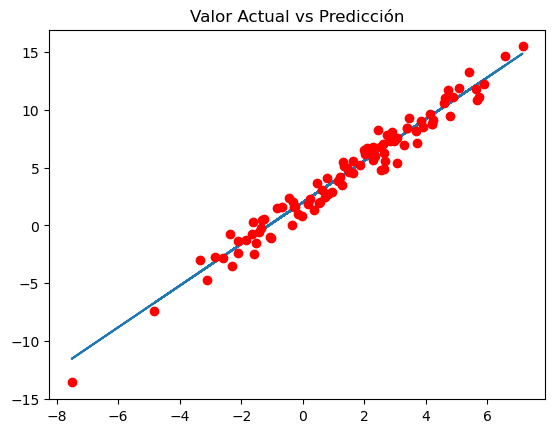

In [15]:
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.title ("Valor Actual vs Predicción")